# Redes neuronales convolucionales aplicadas a clasificación de curvas de luz

Curvas de luz del proyecto MANTRA https://arxiv.org/abs/2006.13163

Red basada en https://github.com/juramaga/ML_relampago/blob/master/Labs/Lab3/Lab3.ipynb

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import gdown
gdown.download(url, output,quiet=False)
url='https://drive.google.com/uc?id=1wKw4oGbI_iYZazmx6EXPZ86AA0Nkr3CE'
output = 'file.zip'

In [ ]:
!unzip file.zip

In [12]:
means=np.loadtxt('means.txt')

In [253]:
labels=np.loadtxt('labs.txt',dtype='str')

Es necesario estandarizar las curvas (para que todas varíen entre 0 y 1) antes de pasárselas a la red.

In [104]:
mx=means.max()
mn=means.min()
cur=(means-mn)/(mx-mn)

Text(0, 0.5, '???')

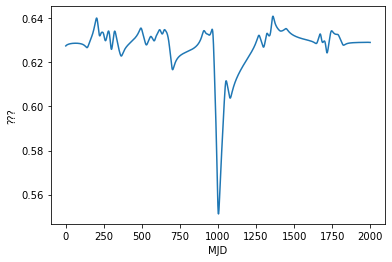

In [328]:
plt.plot(cur[1025])
plt.xlabel('MJD')
plt.ylabel('???')

Pasamos las clases de categóricas a numéricas, ignorando las que son menos comunes ('Other'). Nos quedamos con 6+1 clases.

In [251]:
six_classes=np.array(['AGN','Blazar','CV', 'Flare', 'HPM', 'SN'])

In [268]:
classes=np.asarray([np.arange(len(six_classes))[i==six_classes][0] if i in six_classes else 6 for i in labels ])
seven_classes=np.append(six_classes,'Other')

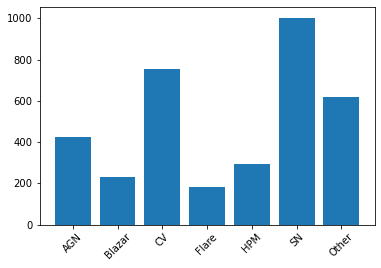

In [269]:
items, counts = np.unique(classes, return_counts=True)
plt.bar(items, counts, align='center')
plt.gca().set_xticks(items)
plt.xticks(tick_marks,labels=seven_classes, rotation=45);

In [270]:
n_classes=len(seven_classes)

Librerías para armar la red.

In [126]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split

from keras.layers import Conv1D, MaxPooling1D
from sklearn import metrics

In [280]:
# Usamos esta función de sklearn para partir los datos (train, test)
X_train,X_test,Y_train,Y_test=train_test_split(cur,classes,test_size=0.33, random_state=40)

Conv1D y Pooling explicado en https://boostedml.com/2020/04/1-d-convolutional-neural-networks-for-time-series-basic-intuition.html

In [343]:
model = Sequential()
model.add(Conv1D(32, 5,input_shape=(X_train.shape[1], 1), kernel_initializer = 'normal'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = (30)))
model.add(Conv1D(64, 5, kernel_initializer = 'normal'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = (30)))
#model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer = 'rmsprop', metrics = ['accuracy'])

In [344]:
eps=100
history = model.fit(X_train, Y_train, batch_size = 128, epochs = eps,validation_split = 0.2, verbose = 1)

Epoch 1/100
15/15 [==============================] - 2s 117ms/step - loss: 1.8244 - accuracy: 0.2651 - val_loss: 1.7145 - val_accuracy: 0.2696
Epoch 2/100
15/15 [==============================] - 1s 99ms/step - loss: 1.7527 - accuracy: 0.2843 - val_loss: 1.6956 - val_accuracy: 0.2696
Epoch 3/100
15/15 [==============================] - 1s 84ms/step - loss: 1.7415 - accuracy: 0.2853 - val_loss: 1.6975 - val_accuracy: 0.2781
Epoch 4/100
15/15 [==============================] - 1s 86ms/step - loss: 1.7168 - accuracy: 0.3140 - val_loss: 1.6626 - val_accuracy: 0.2972
Epoch 5/100
15/15 [==============================] - 2s 107ms/step - loss: 1.6869 - accuracy: 0.3406 - val_loss: 1.6071 - val_accuracy: 0.4183
Epoch 6/100
15/15 [==============================] - 1s 82ms/step - loss: 1.6533 - accuracy: 0.3719 - val_loss: 1.6046 - val_accuracy: 0.3588
Epoch 7/100
15/15 [==============================] - 2s 113ms/step - loss: 1.6251 - accuracy: 0.3783 - val_loss: 1.5485 - val_accuracy: 0.3970
Epo

15/15 [==============================] - 1s 88ms/step - loss: 1.3989 - accuracy: 0.4293 - val_loss: 1.4033 - val_accuracy: 0.4671
Epoch 59/100
15/15 [==============================] - 1s 69ms/step - loss: 1.3941 - accuracy: 0.4325 - val_loss: 1.3796 - val_accuracy: 0.4777
Epoch 60/100
15/15 [==============================] - 1s 68ms/step - loss: 1.3911 - accuracy: 0.4437 - val_loss: 1.3998 - val_accuracy: 0.4628
Epoch 61/100
15/15 [==============================] - 1s 68ms/step - loss: 1.3905 - accuracy: 0.4410 - val_loss: 1.3236 - val_accuracy: 0.4713
Epoch 62/100
15/15 [==============================] - 1s 68ms/step - loss: 1.3938 - accuracy: 0.4320 - val_loss: 1.3669 - val_accuracy: 0.4777
Epoch 63/100
15/15 [==============================] - 1s 67ms/step - loss: 1.3755 - accuracy: 0.4554 - val_loss: 1.3237 - val_accuracy: 0.4777
Epoch 64/100
15/15 [==============================] - 1s 69ms/step - loss: 1.3756 - accuracy: 0.4463 - val_loss: 1.4182 - val_accuracy: 0.4437
Epoch 65/100

Debemos cuidar que el error de validación no supere el error de los test_data.

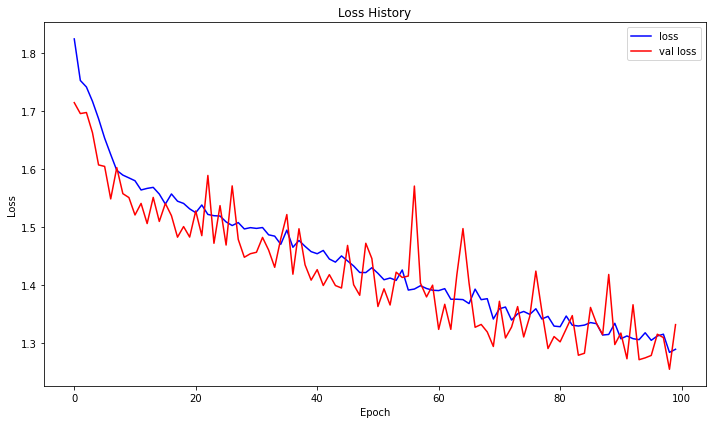

In [345]:
hist = history.history
loss = hist['loss']
val_loss = hist['val_loss']
epochs = np.arange(eps)
fig, axis1 = plt.subplots(figsize=(10,6))
plt.plot(epochs, loss, 'b', label='loss')
plt.plot(epochs, val_loss, 'r', label="val loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss History")
plt.legend(loc='upper right')
plt.tight_layout()

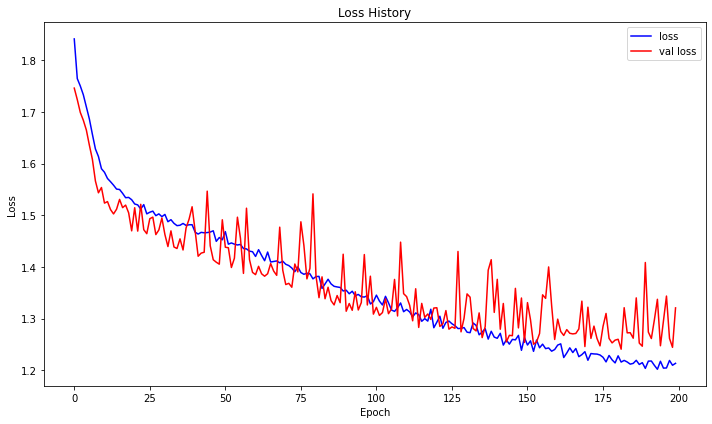

In [287]:
#pools at 30
hist = history.history
loss = hist['loss']
val_loss = hist['val_loss']
epochs = np.arange(eps)
fig, axis1 = plt.subplots(figsize=(10,6))
plt.plot(epochs, loss, 'b', label='loss')
plt.plot(epochs, val_loss, 'r', label="val loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss History")
plt.legend(loc='upper right')
plt.tight_layout()

Usemos algunas métricas para verificar la calidad del modelo.

In [346]:
Y_pred = model.predict(X_test)
Y_pred_real = []
Y_test_real = []
Y_prob = []
for i in range(len(Y_pred)):
    Y_pred_real.append(np.argmax(Y_pred[i]))
    Y_test_real.append(Y_test[i])
    Y_prob.append(np.max(Y_pred[i]))
print(Y_pred_real[:10])
print(Y_test_real[:10])

[5, 5, 5, 4, 0, 5, 0, 0, 5, 5]
[5, 6, 5, 2, 6, 3, 0, 5, 5, 5]


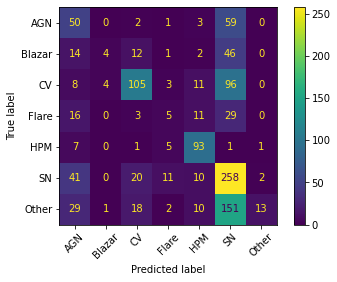

In [347]:
metrics.ConfusionMatrixDisplay.from_predictions(Y_test_real, Y_pred_real)
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks,labels=seven_classes, rotation=45);
plt.yticks(tick_marks,labels=seven_classes );

In [351]:
metrics.precision_score(Y_test_real, Y_pred_real, average='weighted')

0.5358440490007713

In [352]:
metrics.recall_score(Y_test_real, Y_pred_real, average='weighted')

0.455565142364107

In [353]:
metrics.f1_score(Y_test_real, Y_pred_real, average='weighted')

0.3995202596021645

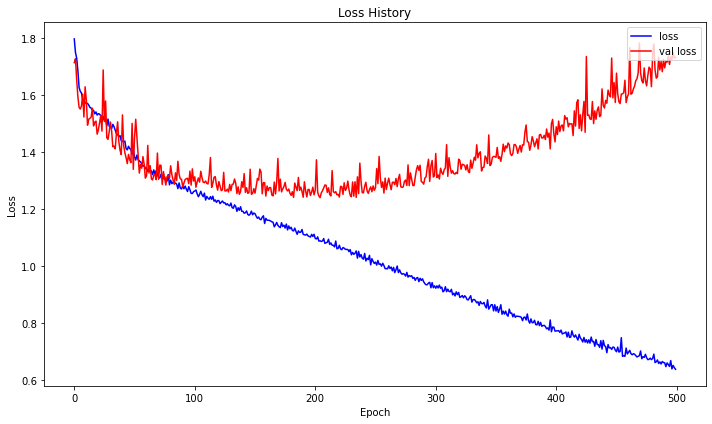

In [207]:
#DO NOT DELETE
hist = history.history
loss = hist['loss']
val_loss = hist['val_loss']
epochs = np.arange(eps)
fig, axis1 = plt.subplots(figsize=(10,6))
plt.plot(epochs, loss, 'b', label='loss')
plt.plot(epochs, val_loss, 'r', label="val loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss History")
plt.legend(loc='upper right')
plt.tight_layout()

# Prueba con una red neuronal sencilla

In [363]:
from keras import layers
from tensorflow.keras.utils import to_categorical


In [364]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [377]:
network = Sequential()
network.add(layers.Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)))
#network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(n_classes, activation='sigmoid'))
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [378]:
network.fit(X_train, train_labels, epochs=10, batch_size=10)

Epoch 1/10
236/236 [==============================] - 4s 15ms/step - loss: 1.9802 - accuracy: 0.2503
Epoch 2/10
236/236 [==============================] - 3s 15ms/step - loss: 1.7525 - accuracy: 0.2733
Epoch 3/10
236/236 [==============================] - 4s 15ms/step - loss: 1.7475 - accuracy: 0.2852
Epoch 4/10
236/236 [==============================] - 4s 17ms/step - loss: 1.7394 - accuracy: 0.2830
Epoch 5/10
236/236 [==============================] - 3s 14ms/step - loss: 1.7347 - accuracy: 0.2915
Epoch 6/10
236/236 [==============================] - 3s 13ms/step - loss: 1.7260 - accuracy: 0.3047
Epoch 7/10
236/236 [==============================] - 3s 12ms/step - loss: 1.7252 - accuracy: 0.3009
Epoch 8/10
236/236 [==============================] - 4s 16ms/step - loss: 1.7219 - accuracy: 0.3064
Epoch 9/10
236/236 [==============================] - 4s 15ms/step - loss: 1.7111 - accuracy: 0.3132
Epoch 10/10
236/236 [==============================] - 4s 18ms/step - loss: 1.7048 - accura

In [379]:
Y_pred = network.predict(X_test)
Y_pred_real = []
Y_test_real = []
Y_prob = []
for i in range(len(Y_pred)):
    Y_pred_real.append(np.argmax(Y_pred[i]))
    Y_test_real.append(Y_test[i])
    Y_prob.append(np.max(Y_pred[i]))
print(Y_pred_real[:10])
print(Y_test_real[:10])

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 6, 5, 2, 6, 3, 0, 5, 5, 5]


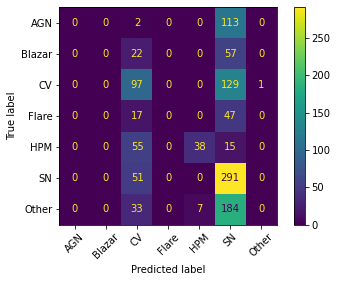

In [380]:
metrics.ConfusionMatrixDisplay.from_predictions(Y_test_real, Y_pred_real)
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks,labels=seven_classes, rotation=45);
plt.yticks(tick_marks,labels=seven_classes );

In [381]:
metrics.precision_score(Y_test_real, Y_pred_real, average='weighted')

/home/german/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.24998829100491496

In [382]:
metrics.recall_score(Y_test_real, Y_pred_real, average='weighted')

0.36755823986194996

In [383]:
metrics.f1_score(Y_test_real, Y_pred_real, average='weighted')

0.2674648704797217